In [1]:
import os 
os.chdir("../")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import reptrvae
import seaborn as sns
from scipy import stats
import matplotlib
import scipy.sparse as sparse
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

Using TensorFlow backend.


In [3]:
path_to_save = "./results/New_Figure/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [4]:
pbmc = sc.read("./data/kang/kang_normalized.h5ad")
pbmc

AnnData object with n_obs × n_vars = 13576 × 2000 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [5]:
haber = sc.read("./data/haber/haber_normalized.h5ad")
haber

AnnData object with n_obs × n_vars = 9842 × 1000 
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [10]:
pbmc_scvi_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/scVI-NK.h5ad")
# pbmc_scgen_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/scGen-NK.h5ad")
# pbmc_saucie_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/SAUCIE-NK.h5ad")
# pbmc_cgan_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/cgan_NK.h5ad")
# pbmc_cvae_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/CVAE-NK.h5ad")
# pbmc_mmdcvae_reconstructed = sc.read("../trVAE_reproducibility/data/reconstructed/kang/MMDCVAE-NK.h5ad")

In [6]:
kang_cell_types = pbmc.obs['cell_type'].unique().tolist()
haber_cell_types = haber.obs['cell_label'].unique().tolist()

In [7]:
kang_reconstructed = None
counter = 0
for cell_type in kang_cell_types:
    reconstructed_adata = sc.read(f"./data/reconstructed/trVAE_kang/{cell_type}.h5ad")
    if kang_reconstructed is None:
        kang_reconstructed = reconstructed_adata.copy()
    else:
        kang_reconstructed = kang_reconstructed.concatenate(reconstructed_adata)
kang_reconstructed

AnnData object with n_obs × n_vars = 13576 × 2000 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'stim'
    var: 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'

In [8]:
scgen_kang_reconstructed = sc.read("./data/reconstructed/kang/scGen-None.h5ad")

# counter = 0
# for cell_type in kang_cell_types:
#     reconstructed_adata = sc.read(f"./data/reconstructed/kang/scGen-{cell_type}.h5ad")
#     if scgen_kang_reconstructed is None:
#         scgen_kang_reconstructed = reconstructed_adata.copy()
#     else:
#         scgen_kang_reconstructed = scgen_kang_reconstructed.concatenate(reconstructed_adata)
scgen_kang_reconstructed

AnnData object with n_obs × n_vars = 19935 × 2000 
    obs: 'batch', 'cell_type', 'condition'

In [9]:
haber_reconstructed = None
counter = 0
for cell_type in haber_cell_types:
    reconstructed_adata = sc.read(f"./data/reconstructed/trVAE_Haber/{cell_type}.h5ad")
    if haber_reconstructed is None:
        haber_reconstructed = reconstructed_adata.copy()
    else:
        haber_reconstructed = haber_reconstructed.concatenate(reconstructed_adata)
haber_reconstructed

AnnData object with n_obs × n_vars = 233912 × 1000 
    obs: 'barcode', 'batch', 'cell_label', 'condition', 'n_counts'

In [10]:
kang_recon_adata = None
for cell_type in kang_cell_types:
    cell_type_adata = pbmc[pbmc.obs['cell_type'] == cell_type]
    cell_type_adata.obs['cond'] = f"{cell_type}_real_"
    cell_type_adata.obs['cond'] = cell_type_adata.obs[['cond', 'condition']].agg(''.join, axis=1)
    pred_stim_adata = kang_reconstructed[((kang_reconstructed.obs['condition'] == "control_to_stimulated") &
                                          (kang_reconstructed.obs['cell_type'] == cell_type))]
    pred_stim_adata.obs['cond'] = f'{cell_type}_pred_stimulated'
    kang_recon_adata = pred_stim_adata.concatenate(cell_type_adata) if kang_recon_adata is None else pred_stim_adata.concatenate(cell_type_adata, kang_recon_adata)

Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


In [11]:
haber_reconstructed.obs['condition'].value_counts()

Control_to_Hpoly.Day10                  41920
Control                                 41920
Hpoly.Day10                             33904
Hpoly.Day3                              27248
Salmonella                              22896
Control_to_Salmonella                   20960
Control_to_Hpoly.Day3                   20960
Hpoly.Day3_to_Hpoly.Day10               13624
Control_to_Hpoly.Day3_to_Hpoly.Day10    10480
Name: condition, dtype: int64

In [12]:
haber.obs['condition'].value_counts()

Control        3240
Hpoly.Day10    2711
Hpoly.Day3     2121
Salmonella     1770
Name: condition, dtype: int64

In [13]:
haber_hpolyDay3_reconstructed = haber_reconstructed[haber_reconstructed.obs['condition'] == 'Control_to_Hpoly.Day3']
haber_hpolyDay10_reconstructed = haber_reconstructed[haber_reconstructed.obs['condition'] == 'Control_to_Hpoly.Day10']
haber_salmonella_reconstructed = haber_reconstructed[haber_reconstructed.obs['condition'] == 'Control_to_Salmonella']

In [14]:
haber_hpolyDay3_recon_adata = None
for cell_type in haber_cell_types:
    cell_type_adata = haber[haber.obs['cell_label'] == cell_type]
    cell_type_adata = cell_type_adata[cell_type_adata.obs['condition'].isin(['Control', 'Hpoly.Day3'])]
    cell_type_adata.obs['cond'] = f"{cell_type}_real_"
    cell_type_adata.obs['cond'] = cell_type_adata.obs[['cond', 'condition']].agg(''.join, axis=1)
    pred_stim_adata = haber_hpolyDay3_reconstructed[((haber_hpolyDay3_reconstructed.obs['condition'] == "Control_to_Hpoly.Day3") &
                                                    (haber_hpolyDay3_reconstructed.obs['cell_label'] == cell_type))]
    pred_stim_adata.obs['cond'] = f'{cell_type}_pred_Hpoly.Day3'
    haber_hpolyDay3_recon_adata = pred_stim_adata.concatenate(cell_type_adata) if haber_hpolyDay3_recon_adata is None else pred_stim_adata.concatenate(cell_type_adata, haber_hpolyDay3_recon_adata)

Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


In [15]:
haber_hpolyDay10_recon_adata = None
for cell_type in haber_cell_types:
    cell_type_adata = haber[haber.obs['cell_label'] == cell_type]
    cell_type_adata = cell_type_adata[cell_type_adata.obs['condition'].isin(['Control', 'Hpoly.Day10'])]
    cell_type_adata.obs['cond'] = f"{cell_type}_real_"
    cell_type_adata.obs['cond'] = cell_type_adata.obs[['cond', 'condition']].agg(''.join, axis=1)
    pred_stim_adata = haber_hpolyDay10_reconstructed[((haber_hpolyDay10_reconstructed.obs['condition'] == "Control_to_Hpoly.Day10") &
                                                      (haber_hpolyDay10_reconstructed.obs['cell_label'] == cell_type))]
    pred_stim_adata.obs['cond'] = f'{cell_type}_pred_Hpoly.Day10'
    haber_hpolyDay10_recon_adata = pred_stim_adata.concatenate(cell_type_adata) if haber_hpolyDay10_recon_adata is None else pred_stim_adata.concatenate(cell_type_adata, haber_hpolyDay10_recon_adata)

Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


In [16]:
haber_salmonella_recon_adata = None
for cell_type in haber_cell_types:
    cell_type_adata = haber[haber.obs['cell_label'] == cell_type]
    cell_type_adata = cell_type_adata[cell_type_adata.obs['condition'].isin(['Control', 'Salmonella'])]
    cell_type_adata.obs['cond'] = f"{cell_type}_real_"
    cell_type_adata.obs['cond'] = cell_type_adata.obs[['cond', 'condition']].agg(''.join, axis=1)
    pred_stim_adata = haber_salmonella_reconstructed[((haber_salmonella_reconstructed.obs['condition'] == "Control_to_Salmonella") &
                                                      (haber_salmonella_reconstructed.obs['cell_label'] == cell_type))]
    pred_stim_adata.obs['cond'] = f'{cell_type}_pred_Salmonella'
    haber_salmonella_recon_adata = pred_stim_adata.concatenate(cell_type_adata) if haber_salmonella_recon_adata is None else pred_stim_adata.concatenate(cell_type_adata, haber_salmonella_recon_adata)

Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


In [17]:
def score(adata, data_name, 
          n_deg=10, n_genes=1000, 
          condition_key="condition", cell_type_key="cell_type",
          conditions={"stim": "stimulated", "ctrl": "control"},
          sortby="median_score"):
    import scanpy as sc
    import numpy as np
    from scipy.stats import entropy
    import pandas as pd
    
    sc.tl.rank_genes_groups(adata, groupby=condition_key, method="wilcoxon", n_genes=n_genes)
    gene_names = adata.uns["rank_genes_groups"]['names'][conditions['stim']]
    gene_lfcs = adata.uns["rank_genes_groups"]['logfoldchanges'][conditions['stim']]
    diff_genes_df = pd.DataFrame({"names": gene_names, "lfc": gene_lfcs})
    diff_genes = diff_genes_df["names"].tolist()[:n_genes]
    print(len(diff_genes))

    adata_deg = adata[:, diff_genes].copy()
    cell_types = adata_deg.obs[cell_type_key].unique().tolist()
    lfc_temp = np.zeros((len(cell_types), n_genes))
    for j, ct in enumerate(cell_types):
        stim = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                         (adata_deg.obs[condition_key] == conditions["stim"])].X.mean(0)
        ctrl = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                         (adata_deg.obs[condition_key] == conditions["ctrl"])].X.mean(0)

        lfc_temp[j] = np.abs((stim - ctrl)[None, :])
    norm_lfc = lfc_temp / lfc_temp.sum(0).reshape((1, n_genes))
    ent_scores = entropy(norm_lfc)
    median = np.median(lfc_temp, axis=0)
    med_scores = np.max(np.abs((lfc_temp - median)), axis=0)
    df_score = pd.DataFrame({"genes": adata_deg.var_names.tolist(), "median_score": med_scores,
                             "entropy_score": ent_scores})
    if sortby == "median_score":
        return df_score.sort_values(by=['median_score'], ascending=False).iloc[:n_deg, :]
    else:
        return df_score.sort_values(by=['entropy_score'], ascending=False).iloc[:n_deg, :]

In [27]:
def plot_boxplot(recon_data, 
                 method, 
                 data_name="kang", 
                 n_genes=100, 
                 n_bins=10,
                 restore=True, 
                 score_type="median_score", 
                 y_measure="SE",
                 scale="log"):
    if data_name == "kang":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        train = sc.read("./data/kang/kang_normalized.h5ad")
    elif data_name.startswith("haber"):
        stim_key = data_name.split("_")[-1]
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        train = sc.read("./data/haber/haber_normalized.h5ad")
    
    import matplotlib
    matplotlib.rc('ytick', labelsize=14)
    matplotlib.rc('xtick', labelsize=14)
    conditions = {"ctrl": ctrl_key, "stim": stim_key}

    sc.settings.figdir = path_to_save

    diff_genes = score(train, data_name, n_deg=n_bins * n_genes, n_genes=1000, cell_type_key=cell_type_key, conditions=conditions,
                       sortby=score_type)
    diff_genes = diff_genes["genes"].tolist()
    
#     epsilon = 1e-7
    os.makedirs(os.path.join(path_to_save, f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/"), exist_ok=True)
    if not restore:
        n_cell_types = len(train.obs[cell_type_key].unique().tolist())
        all_scores = np.zeros(shape=(n_cell_types * n_bins * n_genes, 1))
        for bin_idx in range(n_bins):
            for cell_type_idx, cell_type in enumerate(train.obs[cell_type_key].unique().tolist()):
                real_stim = recon_data[(recon_data.obs[cell_type_key] == cell_type) & (
                        recon_data.obs["cond"] == f"{cell_type}_real_{stim_key}")]
                pred_stim = recon_data[(recon_data.obs[cell_type_key] == cell_type) & (
                        recon_data.obs["cond"] == f"{cell_type}_pred_{stim_key}")]

                real_stim = real_stim[:, diff_genes[bin_idx * n_genes:(bin_idx + 1) * n_genes]]
                pred_stim = pred_stim[:, diff_genes[bin_idx * n_genes:(bin_idx + 1) * n_genes]]
                if sparse.issparse(real_stim.X):
                    real_stim_avg = np.average(real_stim.X.A, axis=0)
                    pred_stim_avg = np.average(pred_stim.X.A, axis=0)
                else:
                    real_stim_avg = np.average(real_stim.X, axis=0)
                    pred_stim_avg = np.average(pred_stim.X, axis=0)
                if y_measure == "SE":  # (x - xhat) ^ 2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE":  # x - xhat
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE:x":  # (x - xhat) / x
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, real_stim_avg)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:x^2":  # (x - xhat) / x^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(real_stim_avg, 2))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE:max(x, 1)":  # (x - xhat) / max(x, 1)
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, np.maximum(real_stim_avg, 1.0))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:max(x, 1)^2":  # (x - xhat)^2 / max(x, 1)^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 2))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:max(x, 1)":  # (x - xhat)^2 / max(x, 1)
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 1.0))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - AE:x":  # 1 - ((x - xhat) / x)
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, real_stim_avg)
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - SE:x^2":  # 1 - ((x - xhat) / x)^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(real_stim_avg, 2))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - AE:max(x, 1)":  # 1 - ((x - xhat) / max(x, 1.0))
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, np.maximum(real_stim_avg, 1.0))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - SE:max(x, 1)^2":  # 1 - ((x - xhat) / max(x, 1.0))
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 2))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                if scale == "log":
                    y_measures_reshaped = np.log(y_measures_reshaped)                    
                start = n_cell_types * n_genes * bin_idx
                all_scores[start + n_genes * cell_type_idx:start + n_genes * (cell_type_idx + 1),
                0] = y_measures_reshaped
        all_scores = np.reshape(all_scores, (-1,))
        print(all_scores.shape)
    else:
        all_scores = np.loadtxt(
            fname=f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/y_measures_{score_type}_{n_genes}_({y_measure}).txt",
            delimiter=",")
    import seaborn as sns
    conditions = [f"Bin-{i // (n_cell_types * n_genes) + 1}" for i in range(n_cell_types * n_bins * n_genes)]
    all_scores_df = pd.DataFrame({"scores": all_scores})
    all_scores_df["conditions"] = conditions
    ax = sns.boxplot(data=all_scores_df, x="conditions", y="scores", whis=np.inf)
#     if scale != "log" and y_measure == "AE:max(x, 1)":
#         ax.set_ylim(0.0, 1.75)
#     elif scale != "log" and y_measure == "SE:max(x, 1)":
#         ax.set_ylim(0.0, 3.0)
#     elif y_measure == "AE:max(x, 1)":
#         ax.set_ylim(-15.0, 0.5)
#     elif y_measure == "SE:max(x, 1)":
#         ax.set_ylim(-30.5, 1.0)
    ax.set_ylim(0.0, 1.5)
    xlabels = ['Bin-%i' % i for i in range(n_bins)]
    ax.set_xticklabels(xlabels, rotation=90)
    if y_measure == "SE":
        plt.ylabel("(x - xhat) ^ 2")
    elif y_measure == "AE":
        plt.ylabel("|x - xhat|")
    elif y_measure == "AE:x":
        plt.ylabel("|x - xhat| / x")
    elif y_measure == "SE:x^2":
        plt.ylabel("((x - xhat) ^ 2) / (x ^ 2)")
    elif y_measure == "AE:max(x, 1)":
        if scale == "log":
            plt.ylabel("log(|x - xhat| / max(x, 1))")
        else: 
            plt.ylabel("|x - xhat| / max(x, 1)")
    elif y_measure == "SE:max(x, 1)^2":
        plt.ylabel("(x - xhat)^2 / max(x, 1)^2")
    elif y_measure == "SE:max(x, 1)":
        if scale == "log":
            plt.ylabel("log((x - xhat)^2 / max(x, 1))")
        else:
            plt.ylabel("(x - xhat)^2 / max(x, 1)")
    elif y_measure == "1 - AE:x":
        plt.ylabel("1 - (|x - xhat| / x)")
    elif y_measure == "1 - SE:x^2":
        plt.ylabel("1 - ((x - xhat)^2 / x^2)")
    elif y_measure == "1 - AE:max(x, 1)":
        plt.ylabel("1 - (|x - xhat| / max(x, 1))")
    elif y_measure == "1 - SE:max(x, 1)^2":
        plt.ylabel("1 - ((x - xhat)^2 / max(x, 1)^2)")
    os.makedirs(os.path.join(path_to_save, f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/"), exist_ok=True)
    plt.tight_layout()
    name = os.path.join(path_to_save, f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/{method}_{data_name}_boxplot_{score_type}_{n_genes}_{scale}.pdf")
    plt.savefig(name, dpi=300)
    plt.show()
    plt.close()

    all_scores = np.reshape(all_scores, (-1, 1))
    return all_scores_df

In [19]:
sc.settings.figdir = path_to_save

In [20]:
def stacked_violin_plot(recon_data, method, data_name="pbmc", score_type="median_score"):
    if data_name == "kang":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        train = sc.read("./data/kang/kang_normalized.h5ad")

    elif data_name.startswith("haber"):
        stim_key = data_name.split("_")[-1]
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        train = sc.read("./data/haber/haber_normalized.h5ad")
        
    conditions = {"ctrl": ctrl_key, "stim": stim_key}

    diff_genes = score(train, data_name, 
                       n_deg=10, n_genes=500, 
                       cell_type_key=cell_type_key, conditions=conditions,
                       sortby=score_type)
    diff_genes = diff_genes["genes"].tolist()
    sc.pl.stacked_violin(recon_data,
                         var_names=diff_genes,
                         groupby="cond",
                         save=f"_{method}_{score_type}_{data_name}.pdf",
                         swap_axes=True,
                         show=True)

In [21]:
scgen_kang_reconstructed.obs['cond'] = scgen_kang_reconstructed.obs['condition']

500


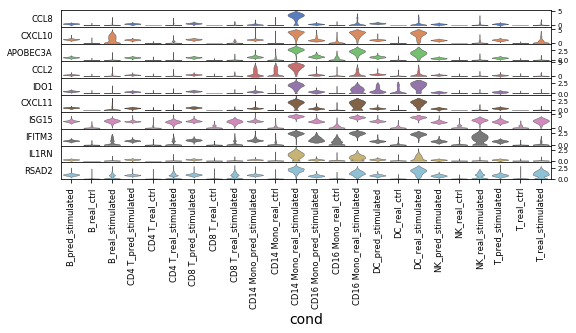

In [24]:
stacked_violin_plot(scgen_kang_reconstructed, "scGen", "kang", "median_score")

500


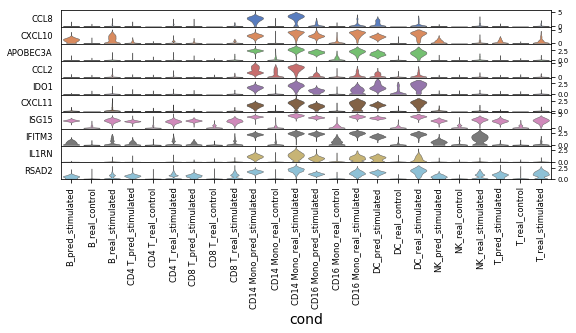

In [75]:
stacked_violin_plot(kang_recon_adata, "trVAE", "kang", "median_score")

... storing 'barcode' as categorical


500


... storing 'cell_label' as categorical
... storing 'cond' as categorical
... storing 'condition' as categorical


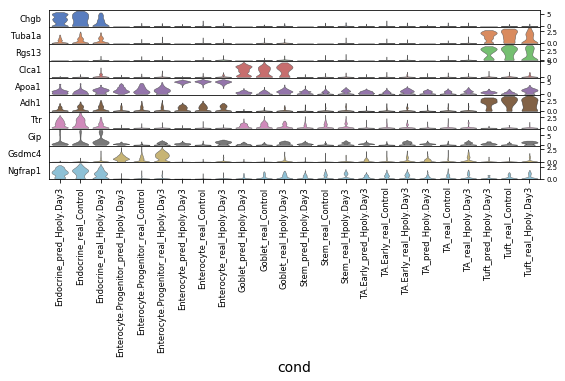

... storing 'barcode' as categorical


500


... storing 'cell_label' as categorical
... storing 'cond' as categorical
... storing 'condition' as categorical


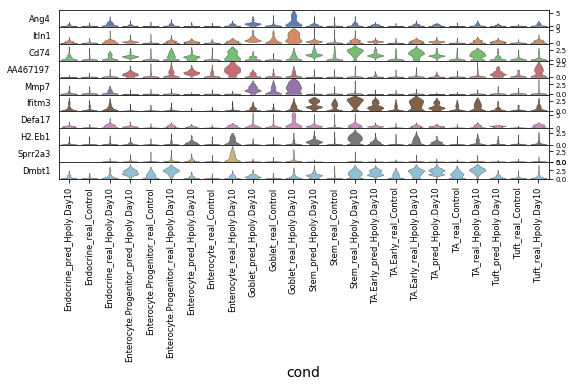

... storing 'barcode' as categorical
... storing 'cell_label' as categorical
... storing 'cond' as categorical
... storing 'condition' as categorical


500


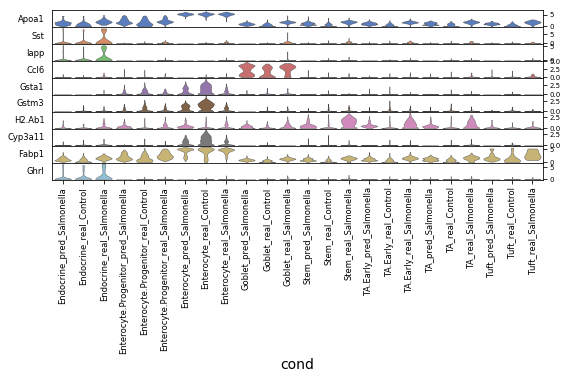

In [76]:
stacked_violin_plot(haber_hpolyDay3_recon_adata, "trVAE", "haber_Hpoly.Day3", "median_score")
stacked_violin_plot(haber_hpolyDay10_recon_adata, "trVAE", "haber_Hpoly.Day10", "median_score")
stacked_violin_plot(haber_salmonella_recon_adata, "trVAE", "haber_Salmonella", "median_score")

1000
(2000,)


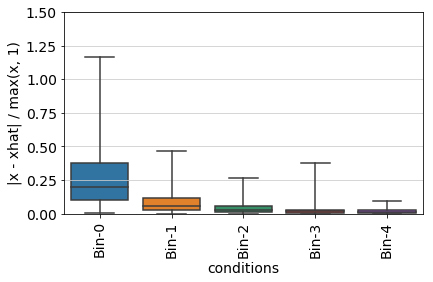

In [28]:
scgen_df = plot_boxplot(recon_data=scgen_kang_reconstructed, 
                         method="scGen",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


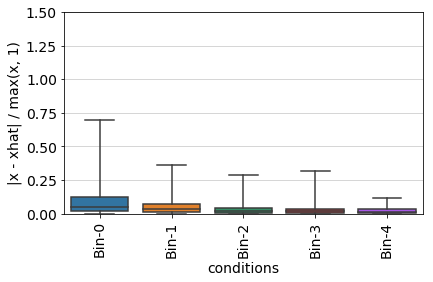

In [29]:
trvae_df = plot_boxplot(recon_data=kang_recon_adata, 
                         method="trVAE",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


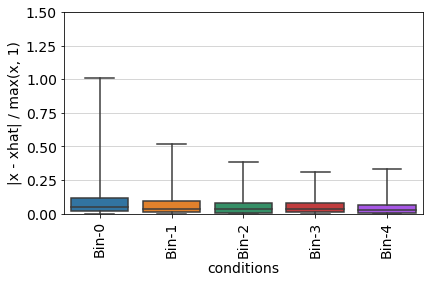

In [24]:
plot_boxplot(recon_data=haber_hpolyDay3_recon_adata, 
             method="trVAE",
             data_name="haber_Hpoly.Day3", 
             n_genes=50,
             n_bins=5,
             restore=False, 
             score_type="median_score", 
             y_measure="AE:max(x, 1)", 
             scale="normal")

1000
(2000,)


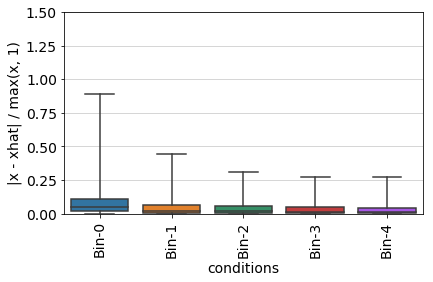

In [25]:
plot_boxplot(recon_data=haber_hpolyDay10_recon_adata, 
             method="trVAE",
             data_name="haber_Hpoly.Day10", 
             n_genes=50, 
             n_bins=5,
             restore=False, 
             score_type="median_score", 
             y_measure="AE:max(x, 1)", 
             scale="normal")

1000
(2000,)


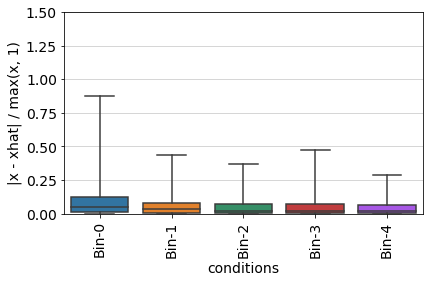

In [26]:
plot_boxplot(recon_data=haber_salmonella_recon_adata, 
             method="trVAE",
             data_name="haber_Salmonella", 
             n_genes=50, 
             n_bins=5,
             restore=False, 
             score_type="median_score", 
             y_measure="AE:max(x, 1)", 
             scale="normal")

In [51]:
scgen_df['method'] = 'scGen'
trvae_df['method'] = 'trVAE'

In [68]:
df = pd.concat([scgen_df, trvae_df], axis=0)
df.head()

,scores,conditions,method
0,0.921918,Bin-1,scGen
1,0.609371,Bin-1,scGen
2,0.672814,Bin-1,scGen
3,0.645312,Bin-1,scGen
4,0.772077,Bin-1,scGen


In [73]:
df = df.groupby(['conditions', 'method'], as_index=False).agg({'scores': ['mean', 'std']})
df.columns = ['conditions', 'method', 'scores_mean', 'scores_std']
df

,conditions,method,scores_mean,scores_std
0,Bin-1,scGen,0.255703,0.203356
1,Bin-1,trVAE,0.085304,0.097352
2,Bin-2,scGen,0.089328,0.091051
3,Bin-2,trVAE,0.051717,0.058573
4,Bin-3,scGen,0.043679,0.046775
5,Bin-3,trVAE,0.032851,0.038694
6,Bin-4,scGen,0.023850,0.030065
7,Bin-4,trVAE,0.024617,0.029004
8,Bin-5,scGen,0.021155,0.020744
9,Bin-5,trVAE,0.021047,0.020504


In [69]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom', fontsize=18)



In [99]:
def grouped_barplot(df, models, types, r2s, r2_stds, filename, put_label=False, legend=False, offset=0.375, step=2):
    plt.close("all")
    matplotlib.rc('ytick', labelsize=25)
    matplotlib.rc('xtick', labelsize=35)
    unique_models = df[models].unique()
    x_pos = np.arange(0, step * len(unique_models), step)
    unique_types = df[types].unique()
    plt.figure(figsize=(15, 10))
    for i, group in enumerate(unique_types):
        group_df = df[df[types] == group]
        b = plt.bar(x_pos + i / 1.25, group_df[r2s].values, capsize=10, alpha=0.95, label=f"{group}",
                    yerr=group_df[r2_stds].values - 0.015)
        a = np.random.normal(group_df[r2s].values, group_df[r2_stds].values, (10, len(unique_models)))
        plt.plot(x_pos + i / 1.25, a.T, '.', color='black', alpha=0.5)
        if put_label:
            autolabel(b)

#     plt.ylabel(r"$\mathrm{R^2}$", fontsize=30)
    plt.xticks(x_pos + offset, unique_models, rotation=90)
    if legend:
        plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, prop={'size': 20})
    plt.ylim(0.0, 0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_save, filename), dpi=300)
    plt.show()



In [100]:
import matplotlib

In [101]:
font = {'family' : 'Arial',
        'size'   : 2}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

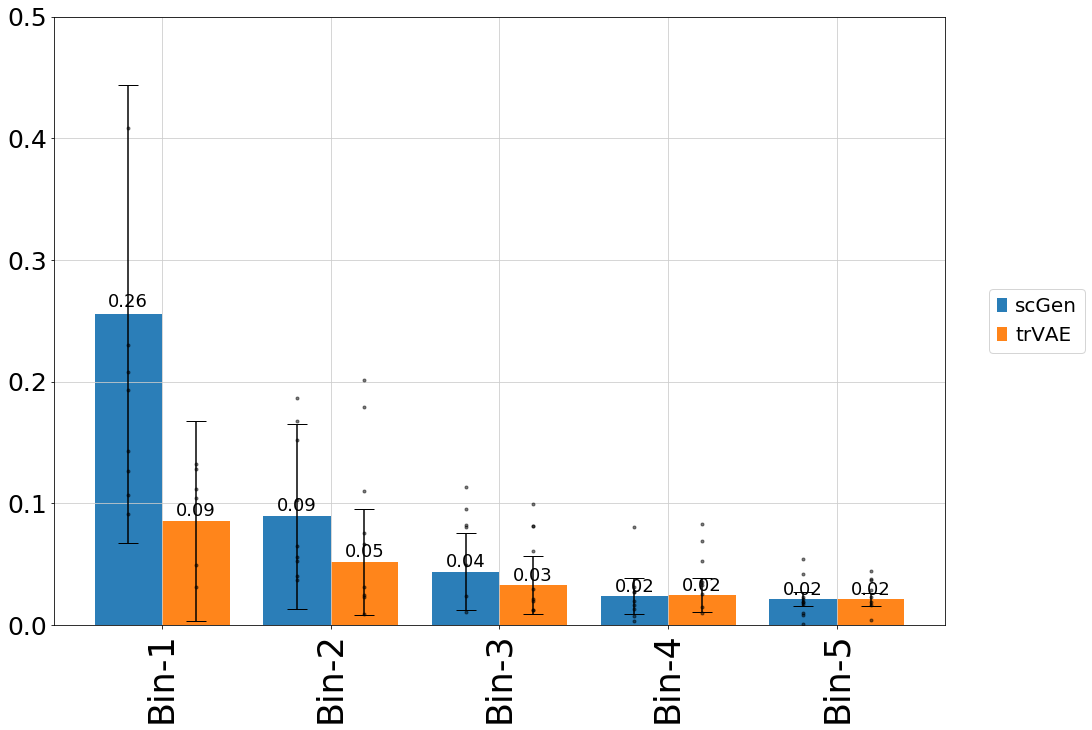

In [102]:
grouped_barplot(df, 
                "conditions", 
                "method", 
                "scores_mean", 
                "scores_std", 
                put_label=True, 
                legend=True, 
                filename="GroupedBarplot_model_comparison_kang.pdf", 
                offset=0.4)